In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import json

import os
import sys

In [54]:
exc = [
    137,
]

In [53]:
import firebase_admin
from firebase_admin import credentials, storage

cred = credentials.Certificate('./b-sc-402909-firebase-adminsdk-yuf0e-000953c2f9.json')

if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {'storageBucket': 'b-sc-402909.appspot.com'})

bucket = storage.bucket()

folder_path = 'pids/'

os.makedirs(folder_path, exist_ok=True)

blobs = bucket.list_blobs(prefix=folder_path)

for blob in blobs:
    # print(f"Processing {blob.name}")
    if blob.name != folder_path:
        # Create the folder if it does not exist
        os.makedirs(os.path.dirname(blob.name), exist_ok=True)

        # Construct the local file path by replacing the folder path in the blob name
        local_file_path = os.path.join(folder_path, blob.name.replace(folder_path, ''))

        # Check if the file already exists
        if os.path.exists(local_file_path):
            # print(f"File {local_file_path} already exists")
            continue

        # Download the file
        blob.download_to_filename(local_file_path)
        # print(f"Downloaded {blob.name} to {local_file_path}")

In [60]:
IMG_DIR = './images'

# Load images
imgs = {}
img_paths = {}

groups = ['A', 'B']

for group in groups:
    imgs[group] = {}
    img_paths[group] = {}

    for im in sorted(os.listdir(IMG_DIR + '/' + group + '/')):
        if im.endswith('.jpg'):
            img_path = IMG_DIR + '/' + group + '/' + im
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            imgs[group][im.split('.')[0]] = img
            img_paths[group][im.split('.')[0]] = img_path

In [61]:
group_count = {
    'A': 0,
    'B': 0
}

age_count = {}

for i in range(12, 75):
    age_count[i] = 0

gender_count = {
    'Male': 0,
    'Female': 0,
    'Other': 0,
    'RatherNotSay': 0
}

In [62]:
HOME_DIR = './pids'

mouse_positions = {}
final_positions = {}

mouse_positions['A'] = {}
mouse_positions['B'] = {}
final_positions['A'] = {}
final_positions['B'] = {}

for i in range(10):
    mouse_positions['A'][i] = {}
    mouse_positions['B'][i] = {}
    final_positions['A'][i] = {}
    final_positions['B'][i] = {}

# Iterate over all participants
for pid in os.listdir(HOME_DIR):
    if int(pid) in exc:
        continue

    # For each participant, extract info{pid}.json and the mousemovements directory
    info_path = os.path.join(HOME_DIR, pid, f'info{pid}.json')
    mousemovements_path = os.path.join(HOME_DIR, pid, 'mousemovements')

    # Load the info file
    with open(info_path, 'r') as f:
        info = json.load(f)

    # Extract participant info
    group = info['group']
    age = info['age']
    gender = info['gender']

    print(group, age, gender, j)

    group_count[group] += 1
    age_count[int(age)] += 1
    gender_count[gender] += 1

    try:
        # Load the mouse movements - each image has its own directory with a single json file named mousemovements{pid}.json
        for im_no in sorted(os.listdir(mousemovements_path)):
            im_path = os.path.join(mousemovements_path, im_no)
            json_path = os.path.join(im_path, f'mousemovements{pid}.json')
            
            try:
                with open(json_path, 'r') as f:
                    p_json = json.load(f)
                    mouse_positions[group][int(im_no)][pid] = p_json['mousePositions']
                    final_positions[group][int(im_no)][pid] = p_json['finalPosition']
            except:
                print(f"Error processing {json_path}")


    except FileNotFoundError:
        print(f"Error processing {pid}")


    



B 55 Male 59
A 20 Male 59
B 34 Female 59
B 31 Female 59
A 50 Female 59
B 19 Male 59
A 48 Male 59
B 55 Female 59
B 53 Female 59
B 32 Female 59
A 27 Male 59
B 37 Female 59
B 58 Female 59
B 60 Female 59
B 23 Male 59
A 41 Female 59
A 26 Female 59
A 30 Female 59
A 34 Female 59
B 36 Female 59
B 41 Female 59
A 59 Male 59
B 22 Male 59
B 65 Female 59
A 20 Male 59
A 26 Female 59
B 50 Female 59
B 43 Female 59
B 40 Male 59
A 33 Female 59
A 21 Male 59
B 41 Female 59
A 17 Male 59
A 43 Female 59
A 64 Female 59
A 64 Female 59
B 36 Male 59
A 37 Male 59
B 49 Female 59
A 59 Female 59
B 52 Female 59
A 31 Female 59
A 47 Female 59
A 50 Male 59
B 24 Female 59
A 46 Male 59
B 21 Male 59
B 47 Female 59
A 31 Female 59
B 27 Male 59
B 32 Female 59
A 20 Male 59
A 45 Female 59
A 28 Male 59
A 55 Male 59
Error processing 10
A 28 Female 59
A 27 RatherNotSay 59
B 27 Male 59
A 30 Female 59
B 52 Male 59
A 39 Female 59
B 41 Female 59
A 53 Female 59
A 32 Male 59
B 52 Female 59
A 43 Male 59
A 28 Female 59
A 25 Female 59
B 53

In [63]:
group_count

{'A': 92, 'B': 70}

In [64]:
gender_count

{'Male': 67, 'Female': 94, 'Other': 0, 'RatherNotSay': 1}

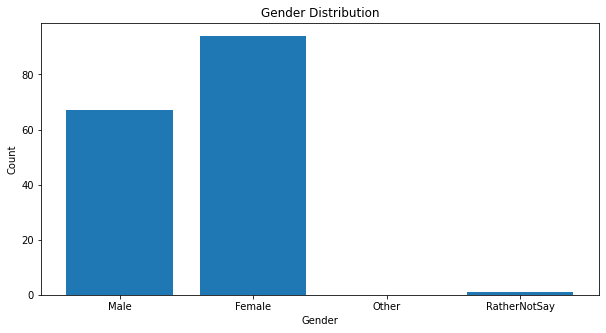

In [65]:
plt.figure(figsize=(10, 5))
plt.bar(gender_count.keys(), gender_count.values())


plt.xlabel('Gender')
plt.ylabel('Count')

plt.title('Gender Distribution')

# plt.grid()

plt.show()

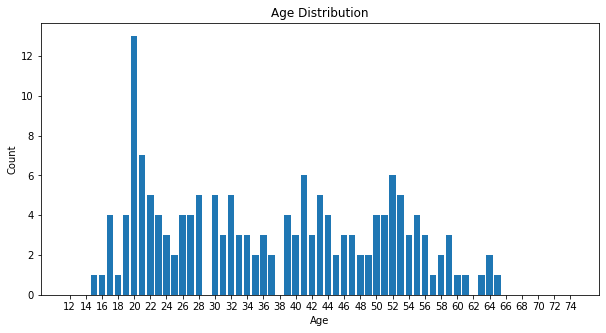

In [66]:
plt.figure(figsize=(10, 5))
plt.bar(age_count.keys(), age_count.values())


plt.xlabel('Age')
plt.ylabel('Count')

plt.xticks(range(12, 75, 2))

plt.title('Age Distribution')

# plt.grid()

plt.show()

In [67]:
def add_circle_to_heatmap(heatmap, x, y, radius, intensity=1):
    y_min, y_max = max(0, int(y - radius)), min(heatmap.shape[0], int(y + radius))
    x_min, x_max = max(0, int(x - radius)), min(heatmap.shape[1], int(x + radius))

    for i in range(y_min, y_max):
        for j in range(x_min, x_max):
            distance = np.sqrt((i - y)**2 + (j - x)**2)
            if distance <= radius:
                heatmap[i, j] += intensity

In [68]:
# Interpolate mouse positions
mouse_positions_interpolated = {}

for group in mouse_positions:
    mouse_positions_interpolated[group] = {}
    
    for im_no in mouse_positions[group]:
        mouse_positions_interpolated[group][im_no] = {}

        for pid in mouse_positions[group][im_no]:
            mouse_positions_interpolated[group][im_no][pid] = []

            positions = mouse_positions[group][im_no][pid]

            for i in range(len(positions)):
                if i == 0:
                    mouse_positions_interpolated[group][im_no][pid].append(positions[i])

                x0, y0 = positions[i - 1]
                x1, y1 = positions[i]

                x = np.linspace(x0, x1, num=10)
                y = np.linspace(y0, y1, num=10)

                for j in range(10):
                    mouse_positions_interpolated[group][im_no][pid].append((x[j], y[j]))

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from matplotlib.colors import LinearSegmentedColormap

ncolors = 256
color_array = plt.get_cmap('jet')(np.linspace(0, 1, 256))
gray_array = plt.get_cmap('bwr')(np.linspace(0, 1, 256))

# Make it so color_array is transparent at 0 and solid at 1
color_array[:,-1] = np.linspace(0,1.0,ncolors)
gray_array[:,-1] = np.linspace(0,1.0,ncolors)


map_object = LinearSegmentedColormap.from_list(name='coolwarm_alpha',colors=color_array)
plt.register_cmap(cmap=map_object)

map_object = LinearSegmentedColormap.from_list(name='gray_alpha',colors=gray_array)
plt.register_cmap(cmap=map_object)

In [ ]:
plt.figure(figsize=(50, 125))

for im_no in range(10):
    g = 1

    plt.figure(figsize=(20, 20))

    for group in ['A', 'B']:
        plt.subplot(1, 2, g)
        plt.imshow(cv2.cvtColor(cv2.imread(img_paths[group][str(im_no)]), cv2.COLOR_BGR2RGB))
        # plt.imshow(cv2.cvtColor(cv2.imread(img_paths[group][str(im_no)]), cv2.COLOR_BGR2GRAY), cmap='gray')

        img_x, img_y = imgs[group][str(im_no)].shape[1], imgs[group][str(im_no)].shape[0]

        # Add all final positions to a heatmap
        heatmap = np.zeros((int(img_y), int(img_x)))
        movements = np.zeros((int(img_y), int(img_x)))

        for pid in mouse_positions_interpolated[group][im_no]:
            positions = mouse_positions_interpolated[group][im_no][pid]

            for i in range(len(positions)):
                x, y = positions[i]

                add_circle_to_heatmap(movements, x, y, radius=3, intensity=1)

        for pid in final_positions[group][im_no]:
            final_position = final_positions[group][im_no][pid].copy()
            add_circle_to_heatmap(heatmap, final_position[0], final_position[1], radius=50, intensity=20)

        plt.plot(img_x / 2, img_y / 2, 'r+', markersize=10, markeredgewidth=1, alpha=0.3)
        heatmap = cv2.GaussianBlur(heatmap, (51, 51), 20)

        plt.imshow(movements, cmap='gray_alpha', alpha=2)
        # plt.imshow(heatmap, cmap='coolwarm_alpha', alpha=1)
        plt.imshow(heatmap, cmap='coolwarm_alpha', alpha=1)

        plt.xticks([]), plt.yticks([])

        g += 1

    plt.tight_layout()
    plt.show()